# Importing Libraries and Reading Data

In [82]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [5]:
#Reading metadata with genre labels
tracks = pd.read_csv('fma-rock-vs-hiphop.csv')

In [6]:
tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [8]:
#Reading track metris with features
echonest_metrics = pd.read_json('echonest-metrics.json', precise_float=True)

In [9]:
echo_tracks = echonest_metrics.merge(tracks[['genre_top', 'track_id']], on = 'track_id')

In [10]:
#Main dataset to work on
echo_tracks

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


In [11]:
#Inspecting the new dataframe
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


# Finding Relationship Among Continuous Variables

To avoid using variables which have strong relation with other variables, using correlation to find strong variables and reduce the number of columns avoiding feature redundancy as: more number of features may result in overfitting and delay the computation time.

In [19]:
#Correlation between columns
cor_mat = echo_tracks.corr()
cor_mat.style.background_gradient(cmap='PuBuGn')

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


[Text(0.5, 1.0, 'Correlation matrix of main echo tracks data')]

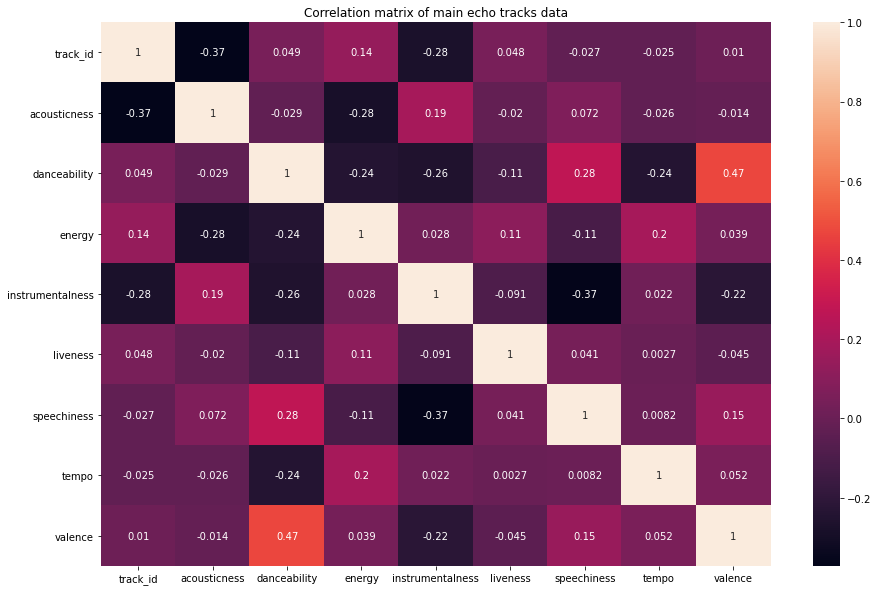

In [21]:
#Plotting Heatmap using Seaborn
plt.figure(figsize=(15,10))
heat = sns.heatmap(cor_mat, annot=True)
heat.set(title = 'Correlation matrix of main echo tracks data')

# Normalising the data and Dimentionality Reduction

The above visualisations of correlation didn't showed strong correlation among features which makes it difficult to drop a column at random. To reduce the number of features, using a dimentionality reductino algorithm Principal Component Analysis (PCA). 

In [23]:
echo_tracks.head(5)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [26]:
#Separating features and labels
features = echo_tracks.iloc[:, 1:-1]
labels = echo_tracks.iloc[:, -1]

In [28]:
#Scaling features 
scalar = StandardScaler()
scaled_train_features = scalar.fit_transform(features)

In [31]:
#Applying PCA
pca = PCA()
pca.fit(scaled_train_features)

PCA()

Explained variance ratio in PCA is the percentage of variance which is attributed by each of the selected components.

Reference: https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6

In [32]:
exp_variance = pca.explained_variance_ratio_
exp_variance

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

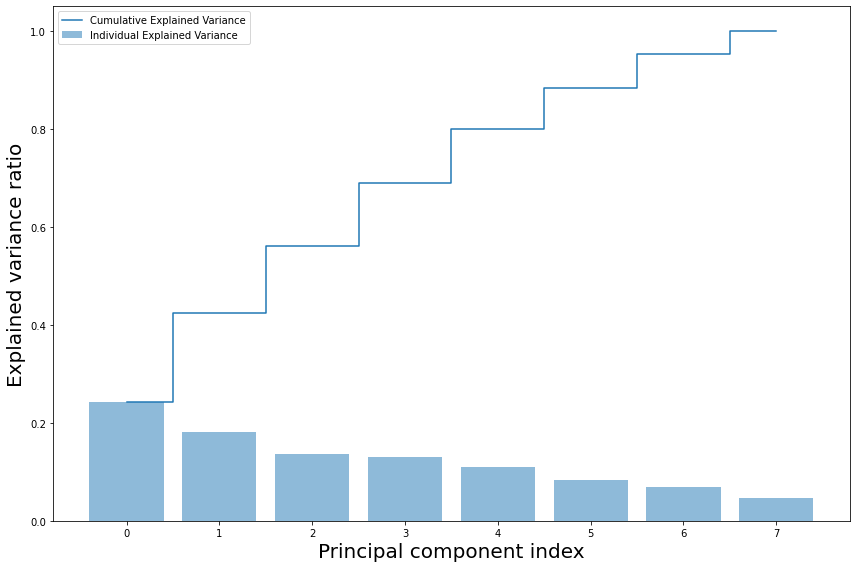

In [50]:
#Plotting the exp variance ratio
# fig, ax = plt.subplots(figsize=(15,10))
# ax.bar(range(pca.n_components_), exp_variance, aplha=0.5)
# ax.set_xlabel('Principal Component')
plt.figure(figsize=(12,8))
plt.bar(range(0, len(exp_variance)), exp_variance, alpha=0.5, 
       align = 'center', label = 'Individual Explained Variance')
plt.step(range(0, len(np.cumsum(exp_variance))), np.cumsum(exp_variance),
        where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained variance ratio', size=20)
plt.xlabel('Principal component index', size=20)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [36]:
#Calculating cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)
cum_exp_variance

array([0.24297674, 0.4234199 , 0.55992299, 0.68986388, 0.80042636,
       0.88344881, 0.95268664, 1.        ])

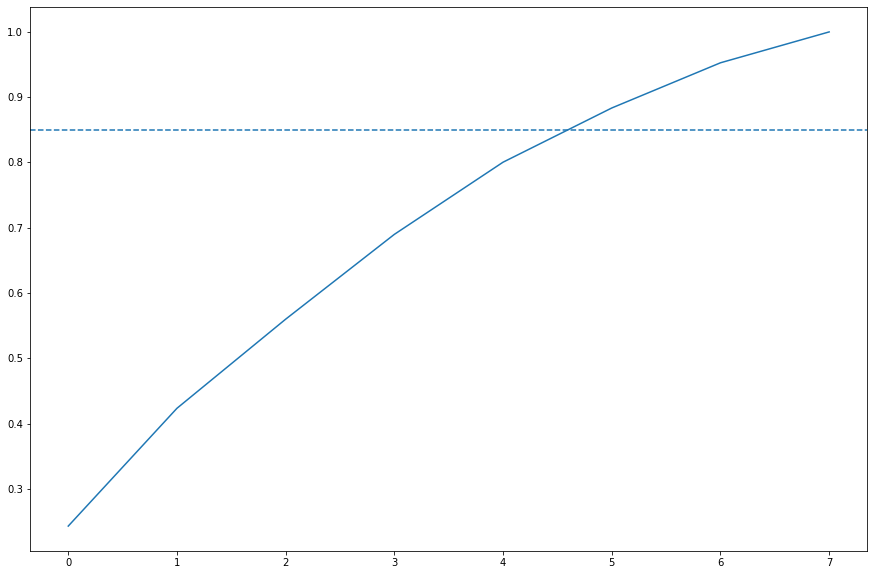

In [43]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

Cutoff are arbitrary near 85 roughly so the figure at cutoff figure shows to choose n components for PCA as 6.

In [44]:
n_components = 6

#Again training PCA for the chosen number of components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

# Classification Models

Since the problem is a classification problem, I'll be using the following Machine Learning algorithms for training and testing the data:

1. Logistic Regression

2. Naive Bayes 

3. SVM

4. Decision Trees

5. Random Forest

In [52]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(pca_projection, 
                                                    labels, random_state=10)

In [55]:
#Creating objects for classifiers
lr = LogisticRegression(random_state=10)
nb = GaussianNB()
svm = svm.SVC(kernel='linear', random_state=10)
dt = DecisionTreeClassifier(random_state=10)
rf = RandomForestClassifier(random_state=10)

In [56]:
#Fitting the training data to the classifiers objects
lr.fit(X_train, Y_train)
nb.fit(X_train, Y_train)
svm.fit(X_train, Y_train)
dt.fit(X_train, Y_train)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=10)

In [57]:
#Predicting the test data to observe the performance
lr_pred = lr.predict(X_test)
nb_pred = nb.predict(X_test)
svm_pred = svm.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

In [65]:
#Comparing confusion matrices
print("\nLogistic Regression: \n", confusion_matrix(Y_test, lr_pred))
print("\nNaive Bayes: \n", confusion_matrix(Y_test, nb_pred))
print("\nSupport Vector Machine: \n", confusion_matrix(Y_test, svm_pred))
print("\nDecision Trees: \n", confusion_matrix(Y_test, dt_pred))
print("\nRandom Forest: \n", confusion_matrix(Y_test, rf_pred))


Logistic Regression: 
 [[128 107]
 [ 39 927]]

Naive Bayes: 
 [[131 104]
 [ 49 917]]

Support Vector Machine: 
 [[122 113]
 [ 31 935]]

Decision Trees: 
 [[140  95]
 [ 93 873]]

Random Forest: 
 [[142  93]
 [ 32 934]]


In [66]:
#Comparing classification reports
print("\nLogistic Regression: \n", classification_report(Y_test, lr_pred))
print("\nNaive Bayes: \n", classification_report(Y_test, nb_pred))
print("\nSupport Vector Machine: \n", classification_report(Y_test, svm_pred))
print("\nDecision Trees: \n", classification_report(Y_test, dt_pred))
print("\nRandom Forest: \n", classification_report(Y_test, rf_pred))


Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201


Naive Bayes: 
               precision    recall  f1-score   support

     Hip-Hop       0.73      0.56      0.63       235
        Rock       0.90      0.95      0.92       966

    accuracy                           0.87      1201
   macro avg       0.81      0.75      0.78      1201
weighted avg       0.86      0.87      0.87      1201


Support Vector Machine: 
               precision    recall  f1-score   support

     Hip-Hop       0.80      0.52      0.63       235
        Rock       0.89      0.97      0.93       966

    accuracy                           0.88      1201
   macro avg       0.84      0.74      0.78      1201
weighte

With the above reports and confusion matrices, we can observe that there is a difference in the precisions of both labels. This can be due to unbalanced data training one feature more as compared to the other. 
As there is not much difference to observe in the f1 scores of models, Random Forest has the hight percentafe of f1 score in predicting both features. 

# Balancing the Data

In [68]:
#Subset of only hip-hop tracks
hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']

#Subset of only rock tracks
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']

In [70]:
#Sampling the rock songs to match the frequency of hip-hop songs. 
rock_only = rock_only.sample(hop_only.shape[0], random_state=10)

In [71]:
#Concatenating the dataframes rock only and hop only
rock_hop_bal = pd.concat([rock_only, hop_only])

In [74]:
#Features of new dataset
features = rock_hop_bal.iloc[:, 1:-1]

#Labels of new dataset
labels = rock_hop_bal.iloc[:, -1]

# Applying PCA and training new Data

In [75]:
pca_projection = pca.fit_transform(scalar.fit_transform(features))

In [76]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(pca_projection, 
                                                    labels, random_state=10)

In [77]:
#Creating objects for classifiers
lr = LogisticRegression(random_state=10)
nb = GaussianNB()
svm = svm.SVC(kernel='linear', random_state=10)
dt = DecisionTreeClassifier(random_state=10)
rf = RandomForestClassifier(random_state=10)

In [78]:
#Fitting the training data to the classifiers objects
lr.fit(X_train, Y_train)
nb.fit(X_train, Y_train)
svm.fit(X_train, Y_train)
dt.fit(X_train, Y_train)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=10)

In [79]:
#Predicting the test data to observe the performance
lr_pred = lr.predict(X_test)
nb_pred = nb.predict(X_test)
svm_pred = svm.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

In [80]:
#Comparing confusion matrices
print("\nLogistic Regression: \n", confusion_matrix(Y_test, lr_pred))
print("\nNaive Bayes: \n", confusion_matrix(Y_test, nb_pred))
print("\nSupport Vector Machine: \n", confusion_matrix(Y_test, svm_pred))
print("\nDecision Trees: \n", confusion_matrix(Y_test, dt_pred))
print("\nRandom Forest: \n", confusion_matrix(Y_test, rf_pred))


Logistic Regression: 
 [[183  47]
 [ 34 191]]

Naive Bayes: 
 [[189  41]
 [ 31 194]]

Support Vector Machine: 
 [[183  47]
 [ 34 191]]

Decision Trees: 
 [[169  61]
 [ 59 166]]

Random Forest: 
 [[187  43]
 [ 27 198]]


In [81]:
#Comparing classification reports
print("\nLogistic Regression: \n", classification_report(Y_test, lr_pred))
print("\nNaive Bayes: \n", classification_report(Y_test, nb_pred))
print("\nSupport Vector Machine: \n", classification_report(Y_test, svm_pred))
print("\nDecision Trees: \n", classification_report(Y_test, dt_pred))
print("\nRandom Forest: \n", classification_report(Y_test, rf_pred))


Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.80      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455


Naive Bayes: 
               precision    recall  f1-score   support

     Hip-Hop       0.86      0.82      0.84       230
        Rock       0.83      0.86      0.84       225

    accuracy                           0.84       455
   macro avg       0.84      0.84      0.84       455
weighted avg       0.84      0.84      0.84       455


Support Vector Machine: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.80      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighte

As we can clearly observe the difference between new classification reports and the previous reports, after balancing the data the f1 scores for both labels are nearly same making the model more efficient on predicting labels. 

# Cross Validation Evaluation of models

The splitting of dataset can also effect the model's performance, CV attempts to split the data in multiple ways and test on each splits. I have KFold CV as a cross validation algorithm. 

In [83]:
#Declaring KFold object
kf = KFold(10)

In [85]:
logreg = LogisticRegression(random_state=10)
naive = GaussianNB()
SVM = svm.SVC(kernel='linear', random_state=10)
tree = DecisionTreeClassifier(random_state=10)
forest = RandomForestClassifier(random_state=10)

In [86]:
#Training models using KFold
log_score = cross_val_score(logreg, pca_projection, labels, cv=kf)
naive_score = cross_val_score(naive, pca_projection, labels, cv=kf)
svm_score = cross_val_score(logreg, pca_projection, labels, cv=kf)
tree_score = cross_val_score(tree, pca_projection, labels, cv=kf)
forest_score = cross_val_score(forest, pca_projection, labels, cv=kf)

In [87]:
print("\n Logistic Regression   : ", np.mean(log_score), 
      "\n Naive Bayes           : ", np.mean(naive_score),
      "\n Support Vector Machine: ", np.mean(svm_score), 
      "\n Decision Tree         : ", np.mean(tree_score), 
      "\n Random Forest         : ", np.mean(forest_score))


 Logistic Regression   :  0.782967032967033 
 Naive Bayes           :  0.7978021978021979 
 Support Vector Machine:  0.782967032967033 
 Decision Tree         :  0.7489010989010989 
 Random Forest         :  0.8142857142857143
